In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Analysis of Super Store.csv")
df.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:xlabel='Segment'>

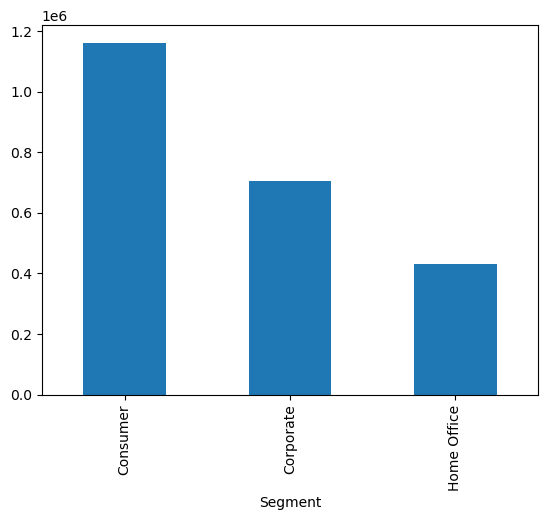

In [16]:
df.groupby("Segment")["Sales"].sum().plot.bar()

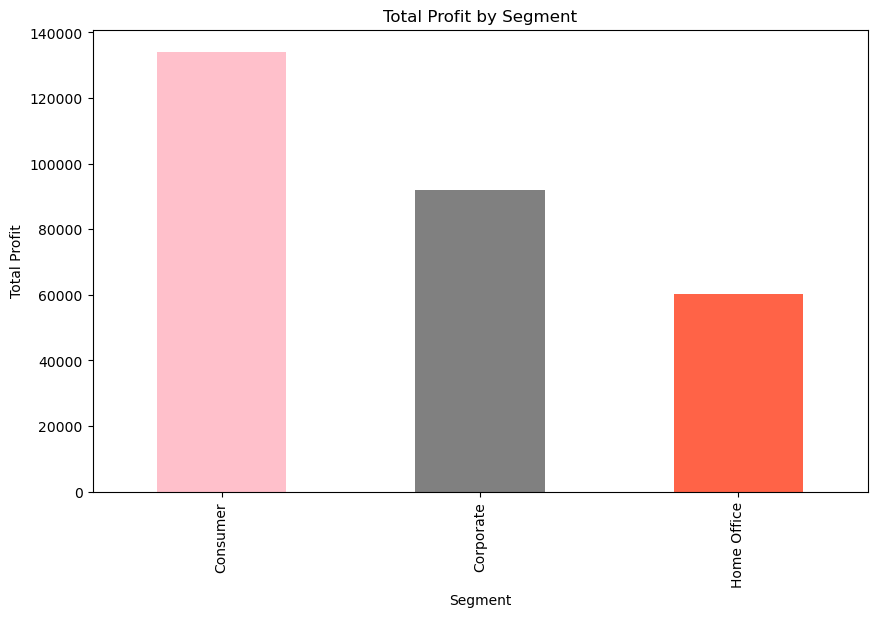

In [20]:
# Plot profit by segment
plt.figure(figsize=(10,6))
df.groupby("Segment")["Profit"].sum().plot.bar(color=['pink', 'gray', 'tomato'])
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()


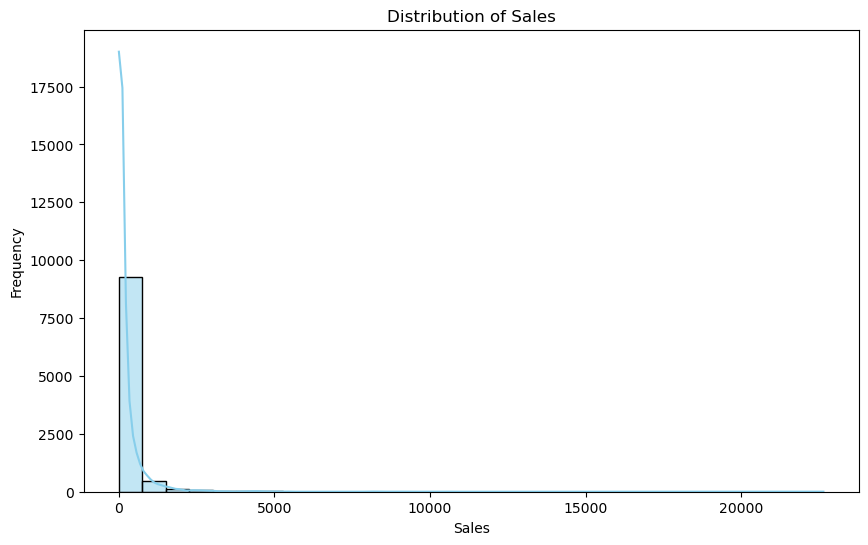

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


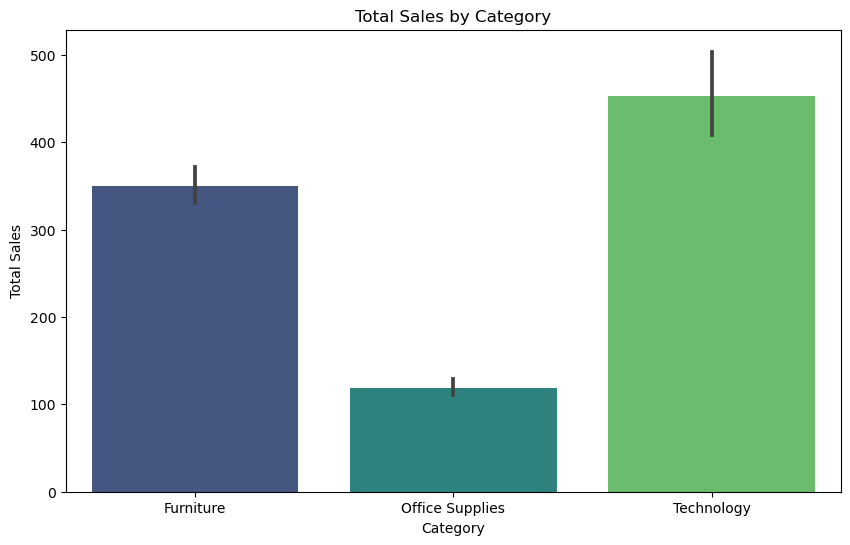

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


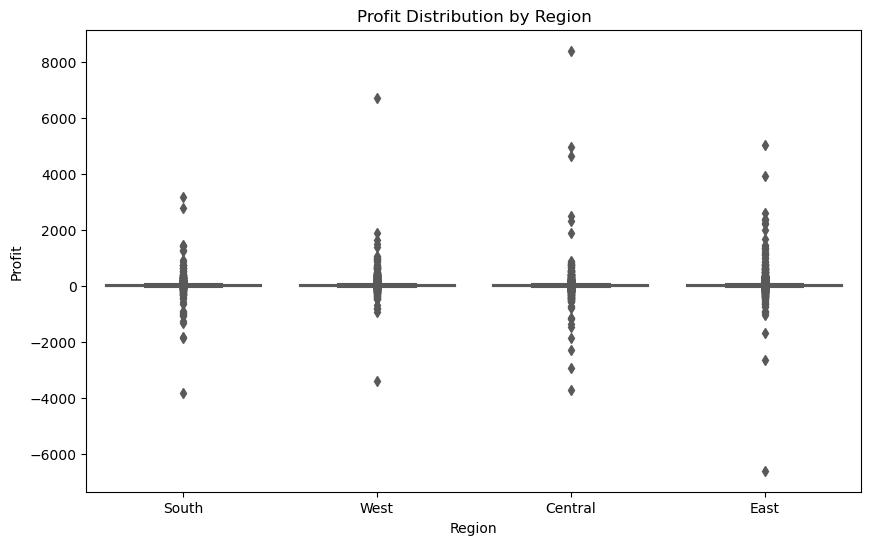

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df, palette='Set2')
plt.title('Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()


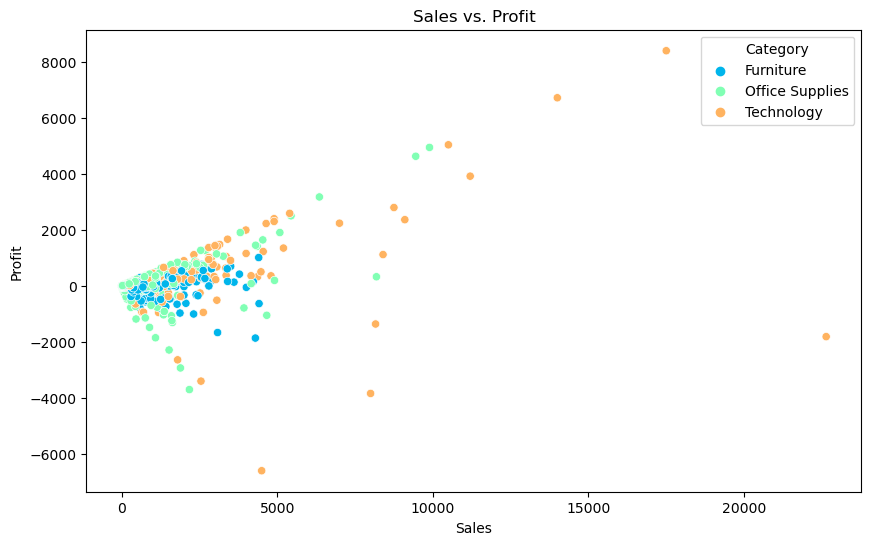

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category', palette='rainbow')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


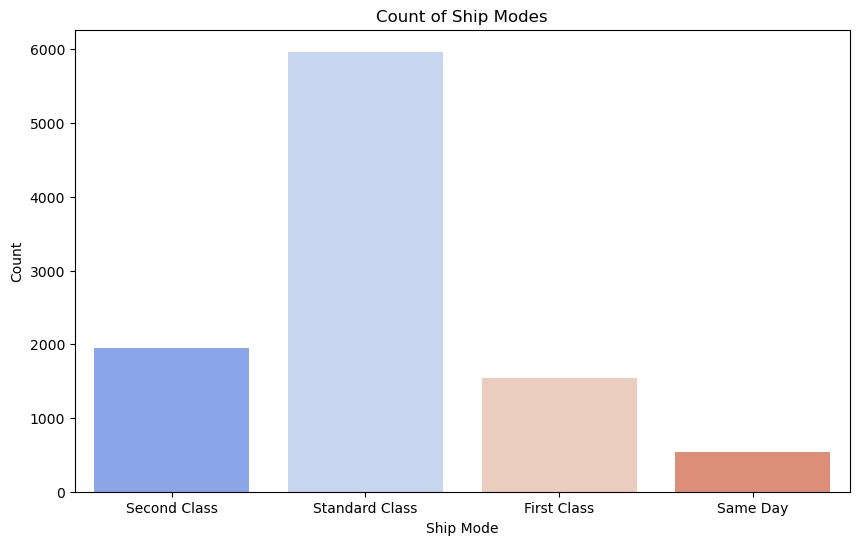

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=df, palette='coolwarm')
plt.title('Count of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()


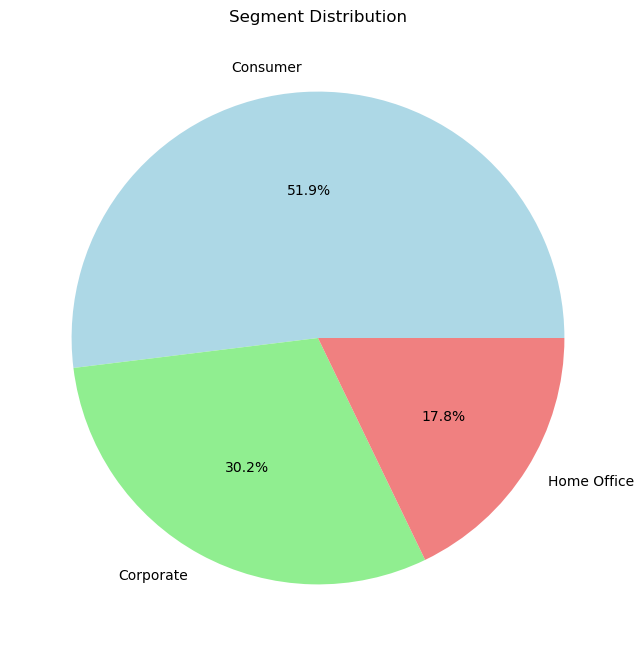

In [12]:
plt.figure(figsize=(8, 8))
df['Segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Segment Distribution')
plt.ylabel('')
plt.show()


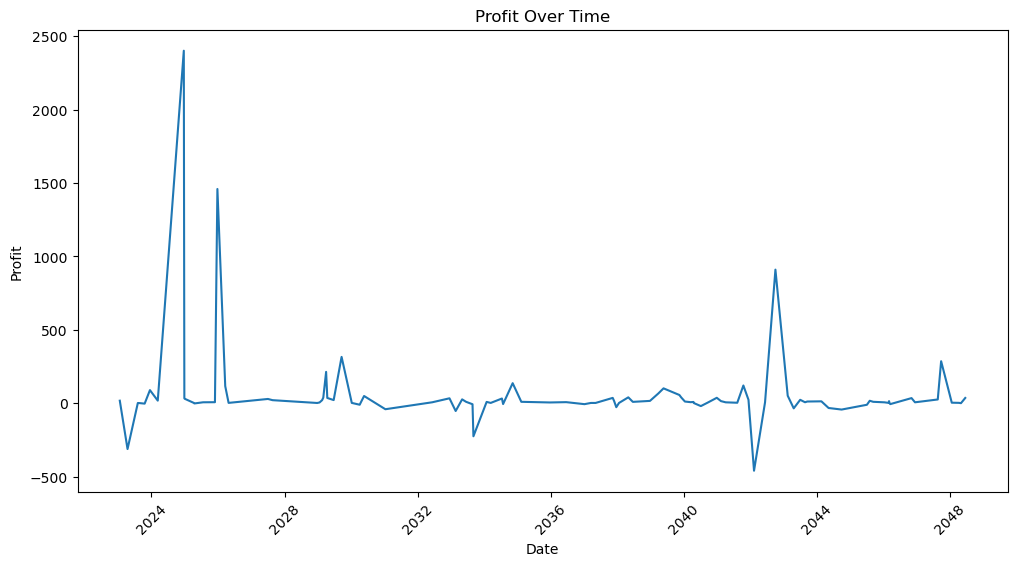

In [13]:


np.random.seed(0)
dates = pd.date_range('2022-01-01', periods=len(df))
df['Date'] = dates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Profit', data=df.sample(100), estimator=np.mean, ci=None)
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


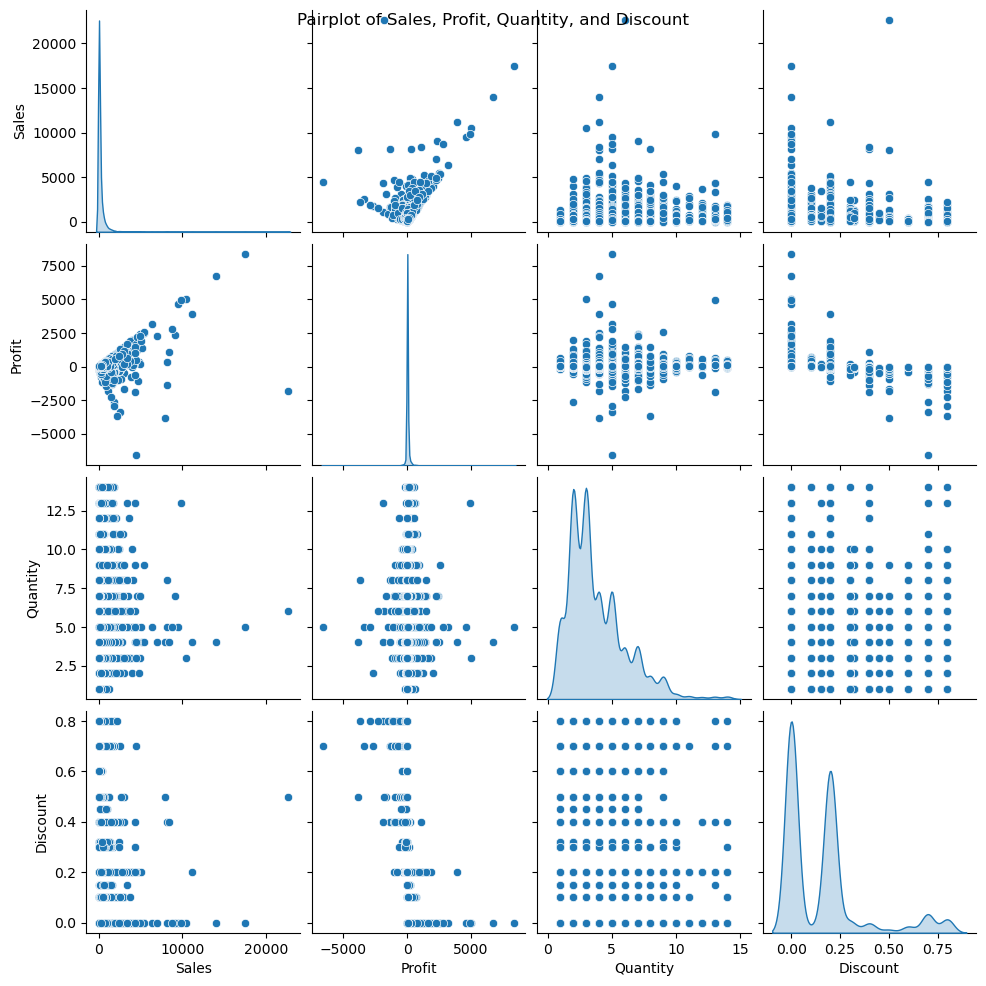

In [14]:
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Sales, Profit, Quantity, and Discount')
plt.show()


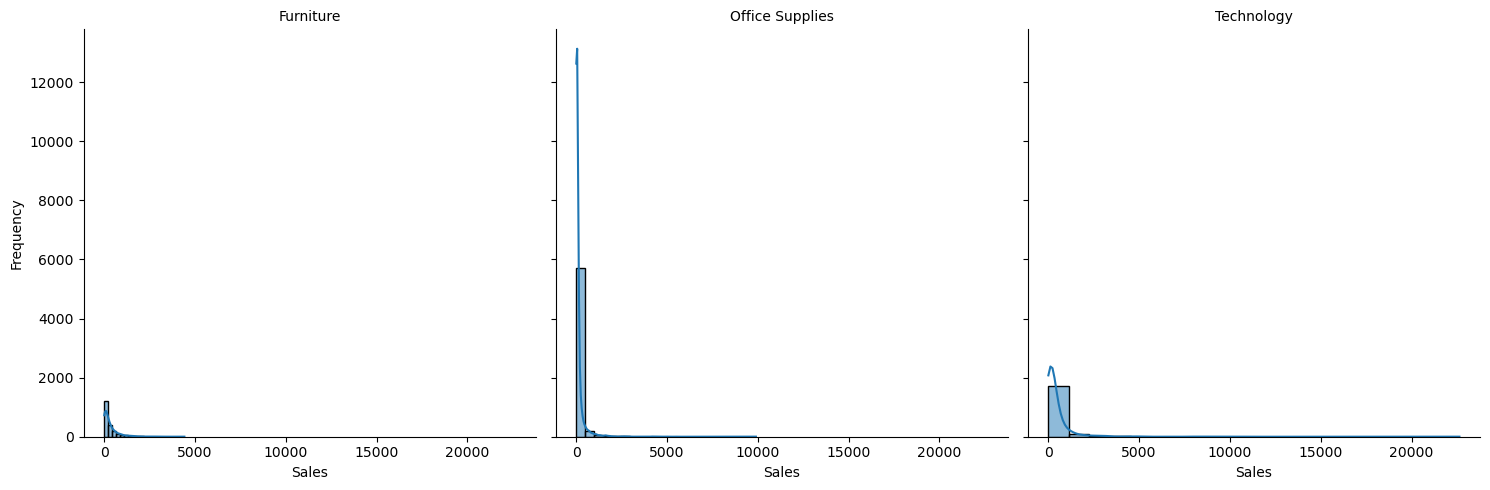

In [15]:
g = sns.FacetGrid(df, col='Category', col_wrap=3, height=5)
g.map_dataframe(sns.histplot, x='Sales', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Sales', 'Frequency')
plt.tight_layout()
plt.show()
